<a href="https://colab.research.google.com/github/bahing-rai/AI-Coursework/blob/main/AI(Porject).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)

# Loading and preparing data

In [2]:
df = pd.read_csv("muse_v3.csv")
df = df.dropna(subset=["valence_tags", "arousal_tags", "dominance_tags"])
df["is_positive"] = df["valence_tags"].apply(lambda x: 1 if x >= 5 else 0)


# Features and target

In [3]:
X = df[["valence_tags", "arousal_tags", "dominance_tags"]]
y = df["is_positive"]

# Train/Test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# KNN Model

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


# Cross-validation

In [7]:
cv_scores = cross_val_score(knn, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-Validation Accuracy: 0.98 ± 0.01


# Confusion Matrix

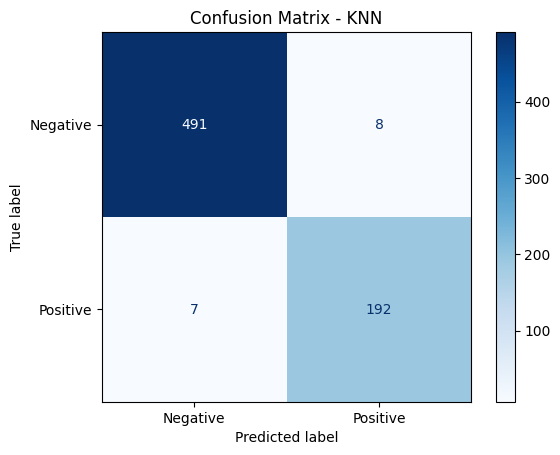

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()